Machine Learning
Task 1 :
Download the dataset from https://drive.google.com/file/d/1SMxwWg5DjKEPwdhPM_590he60S1GrfhU/view?usp=sharing and perform the following actions:

1.Preprocess the data.
2.Plot a detailed respective graph for each column.
3.Analyse the data properly and train the most suitable machine learning to analyse if the person is diabetic.
5.Test the trained model
6.Evaluate the model and tune the model to maximize the accuracy

In [ ]:
# Step 1: Preprocess the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV

# Load dataset
data = pd.read_csv('https://drive.google.com/uc?id=1SMxwWg5DjKEPwdhPM_590he60S1GrfhU')  # replace with your dataset path

# Show basic info
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236378 entries, 0 to 236377
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          236378 non-null  float64
 1   HighBP                236378 non-null  int64  
 2   HighChol              236378 non-null  float64
 3   CholCheck             236378 non-null  int64  
 4   BMI                   236378 non-null  float64
 5   Smoker                236378 non-null  float64
 6   Stroke                236378 non-null  float64
 7   HeartDiseaseorAttack  236378 non-null  float64
 8   PhysActivity          236378 non-null  int64  
 9   Fruits                236378 non-null  int64  
 10  Veggies               236378 non-null  int64  
 11  HvyAlcoholConsump     236378 non-null  int64  
 12  AnyHealthcare         236378 non-null  int64  
 13  NoDocbcCost           236378 non-null  float64
 14  GenHlth               236378 non-null  float64
 15  

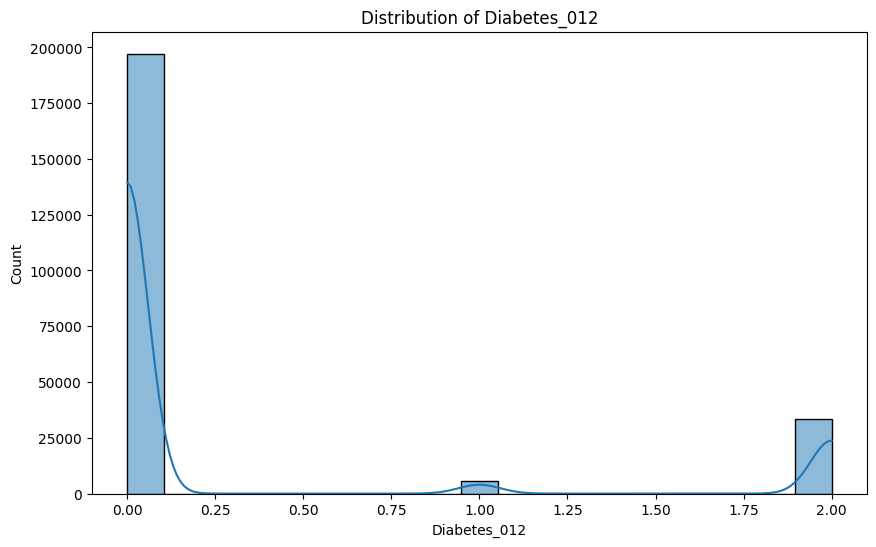

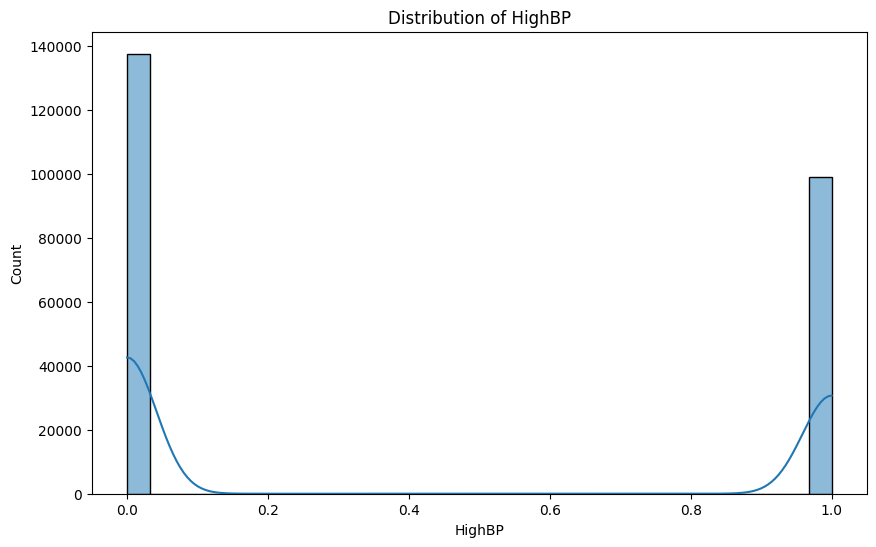

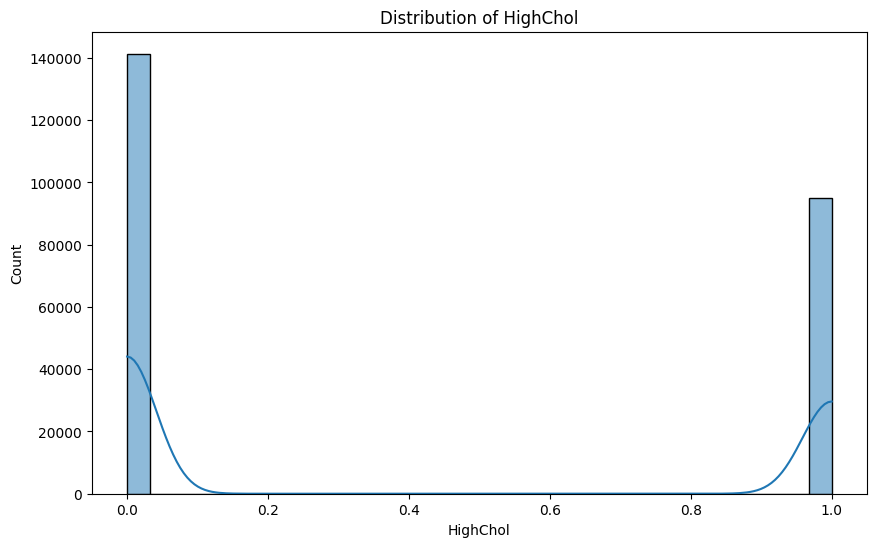

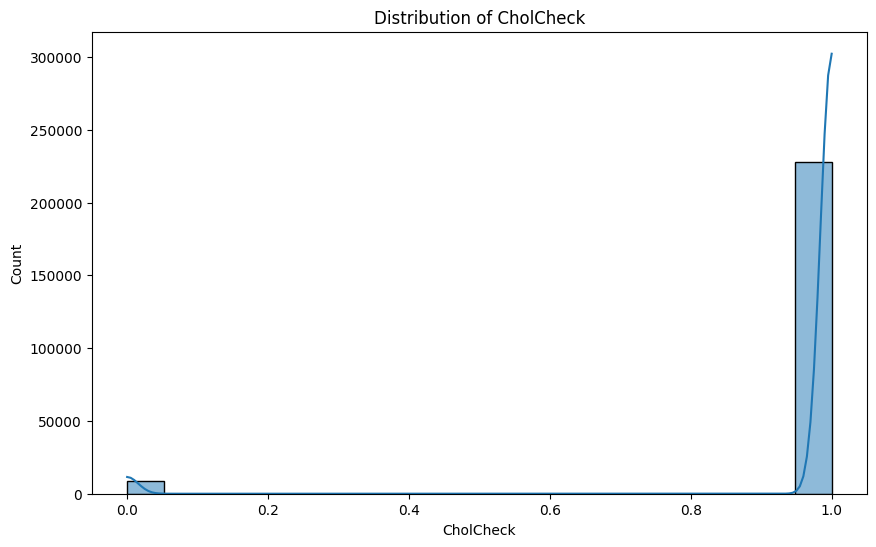

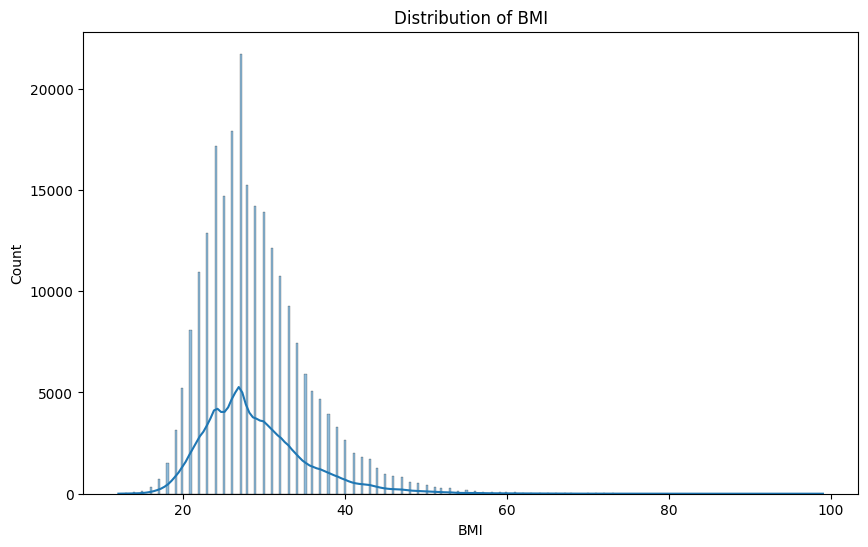

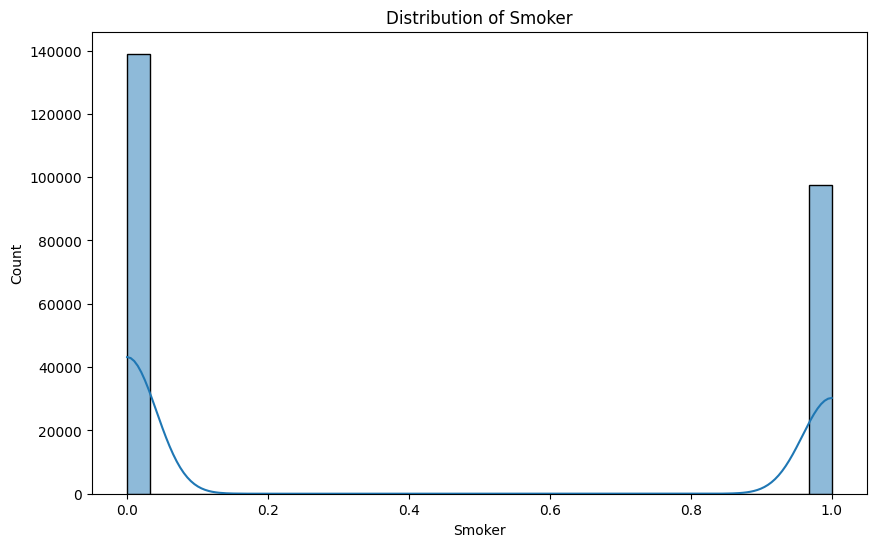

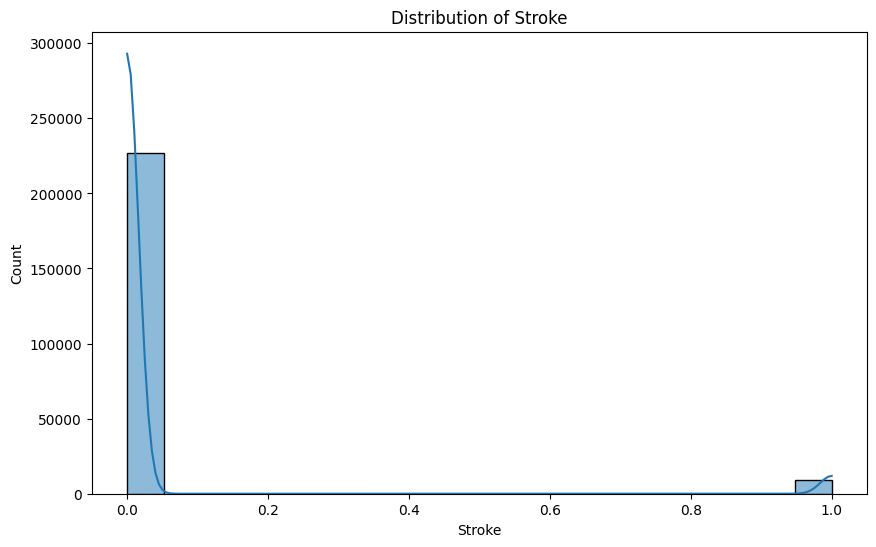

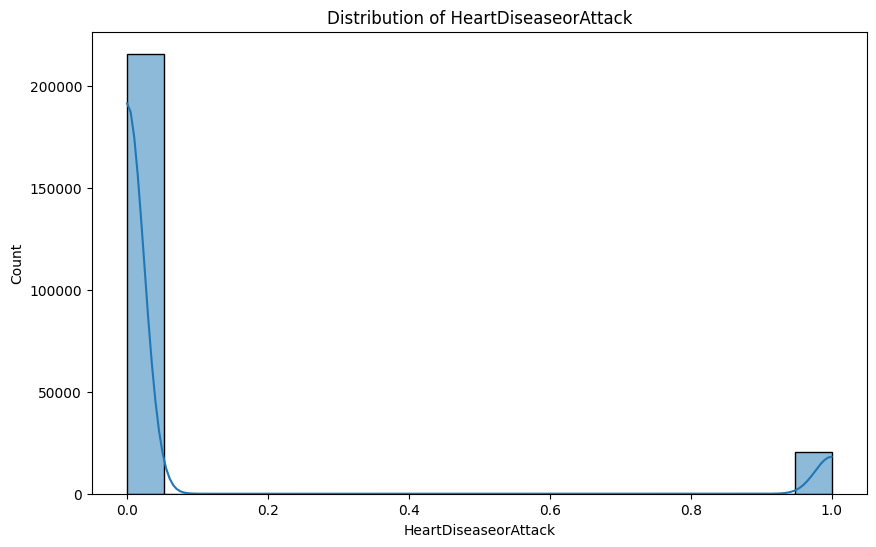

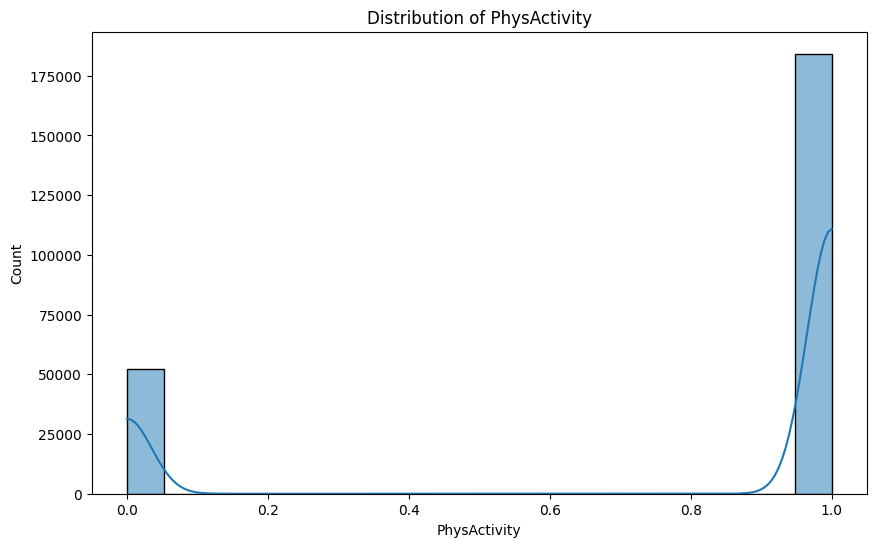

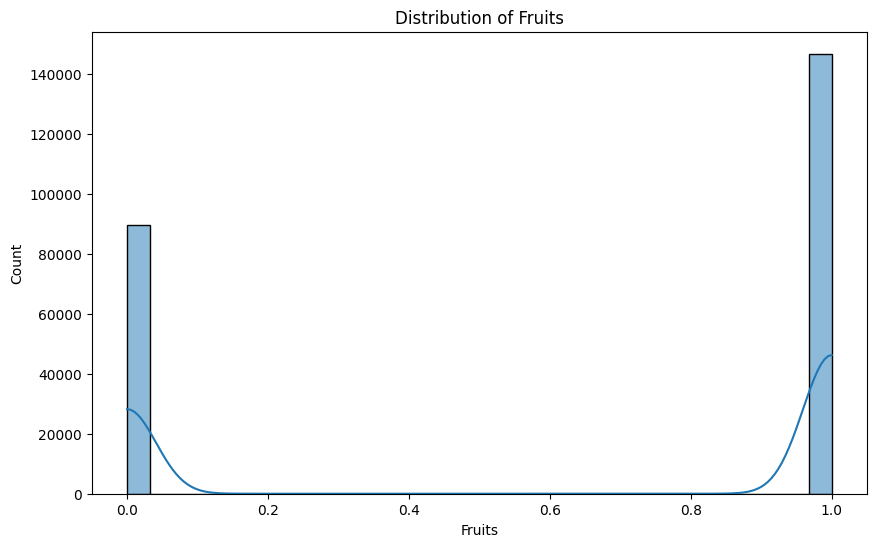

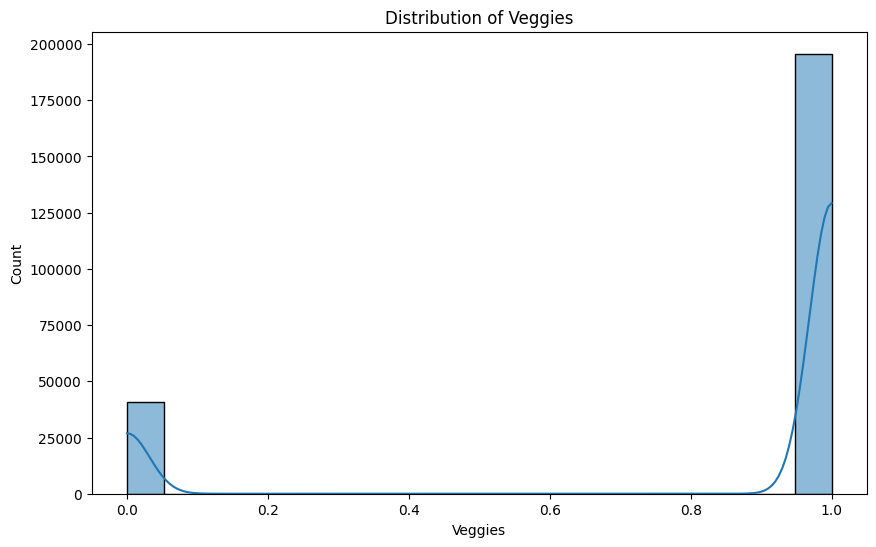

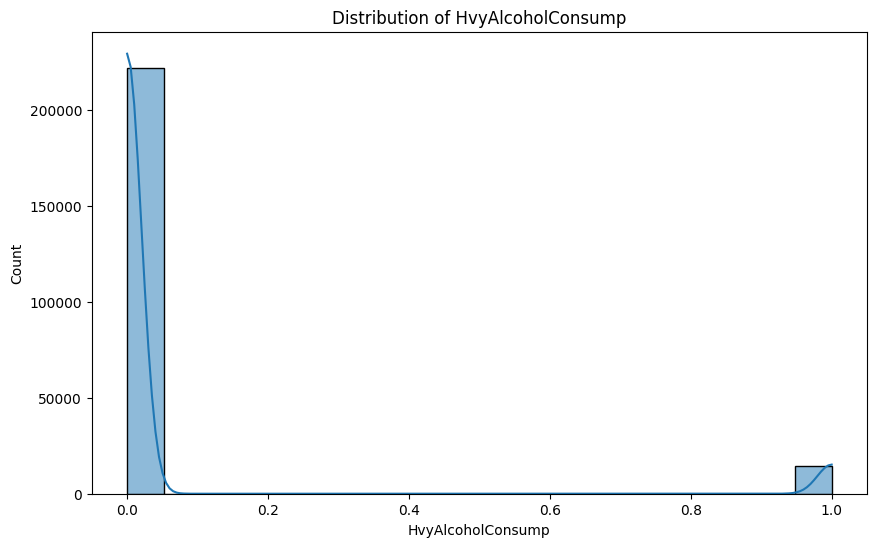

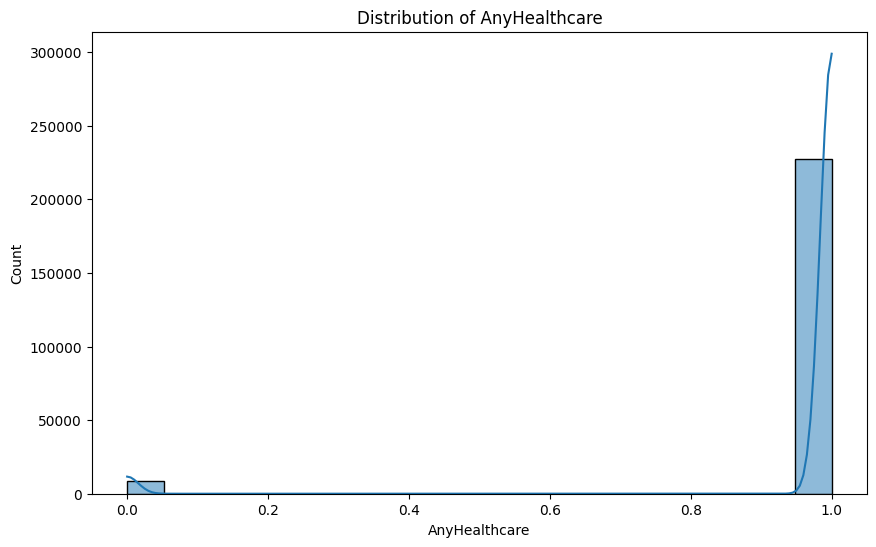

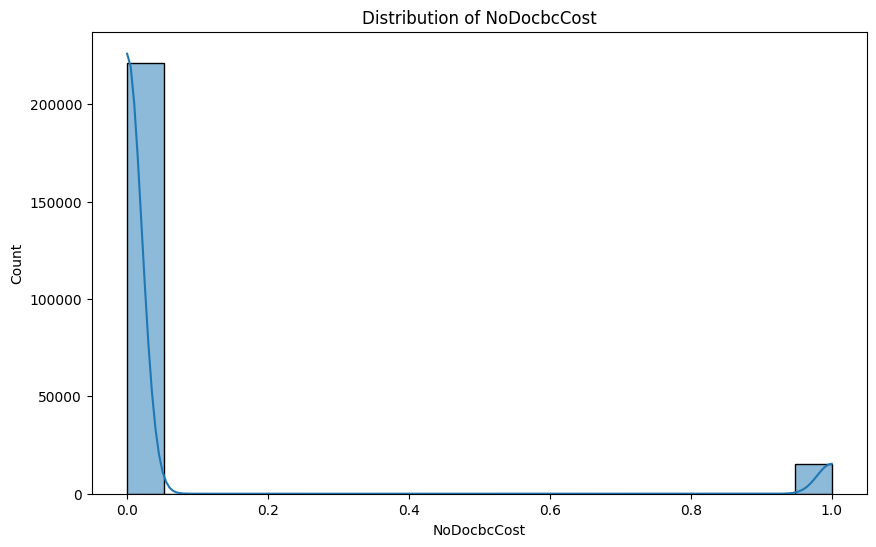

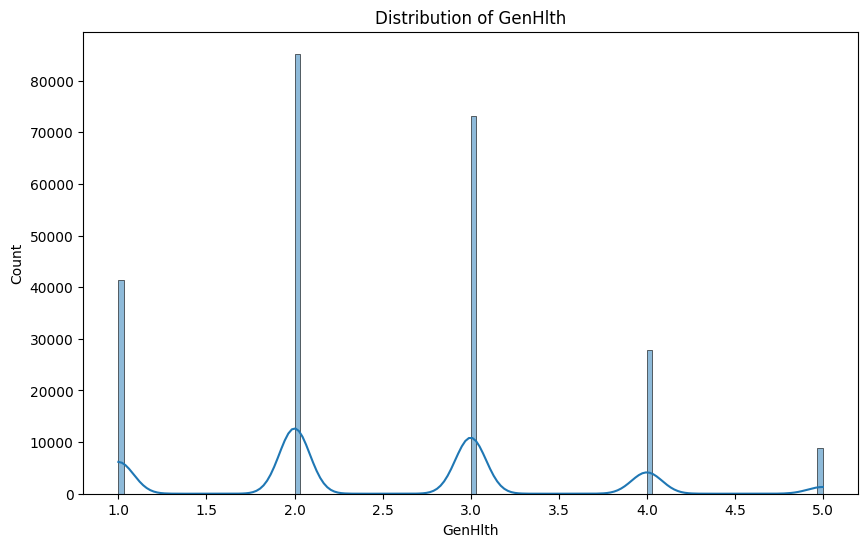

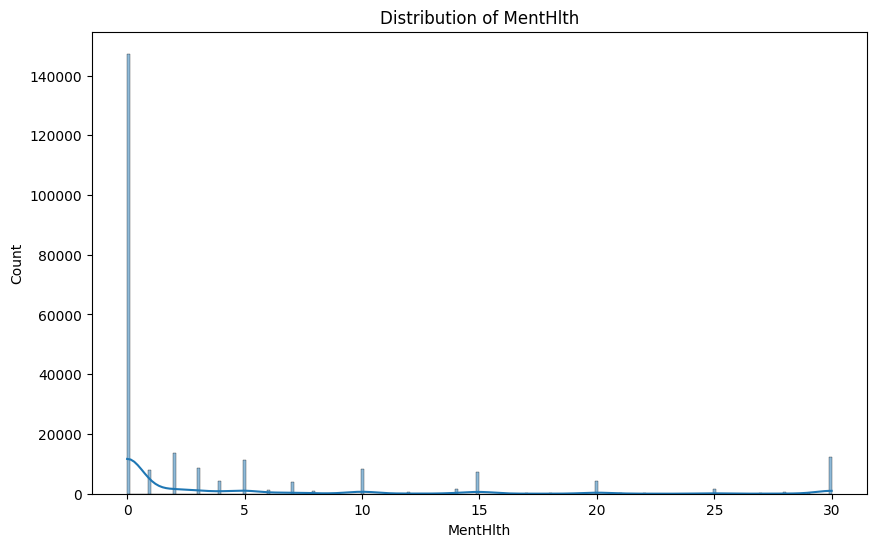

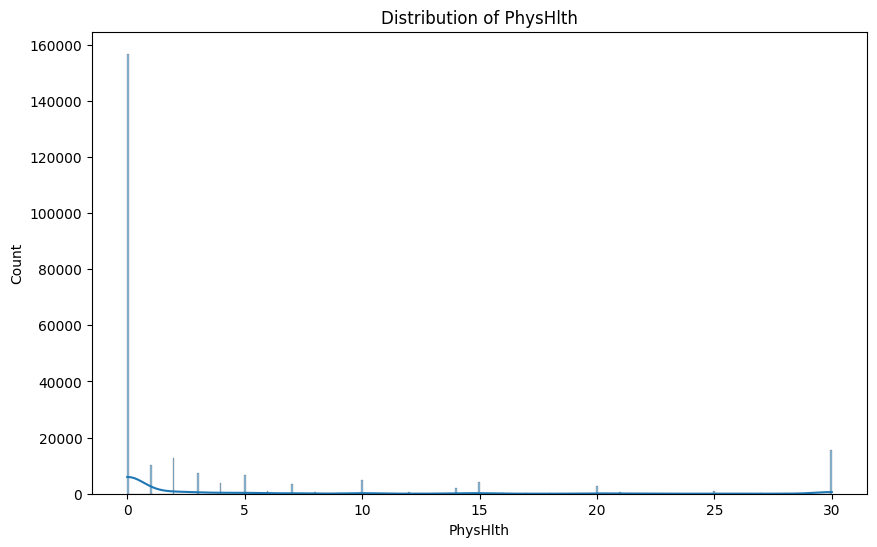

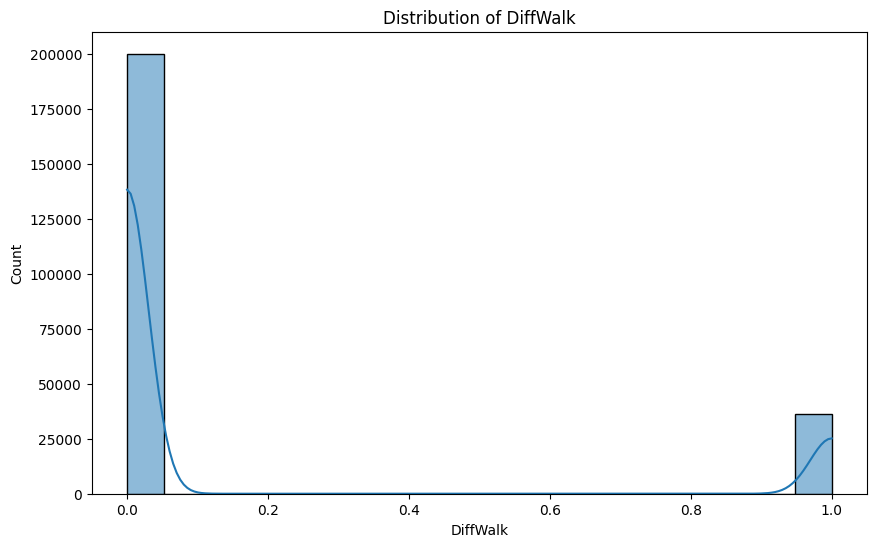

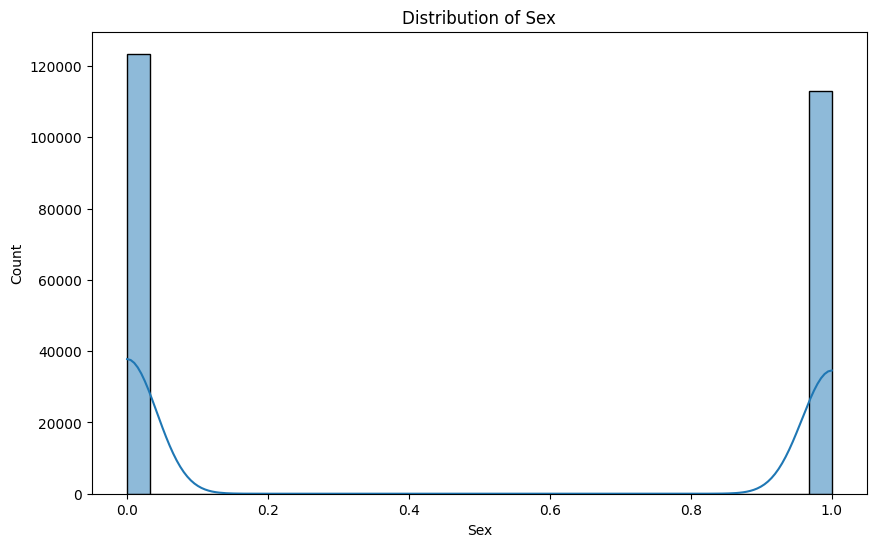

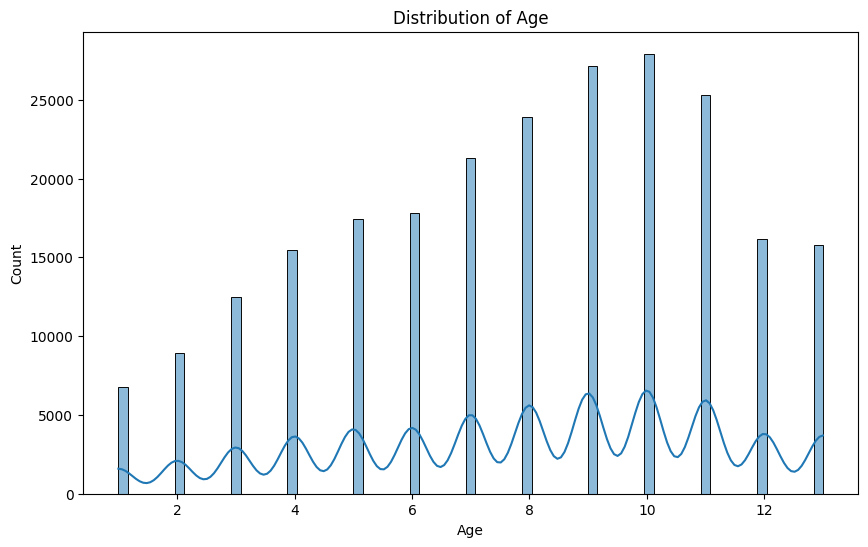

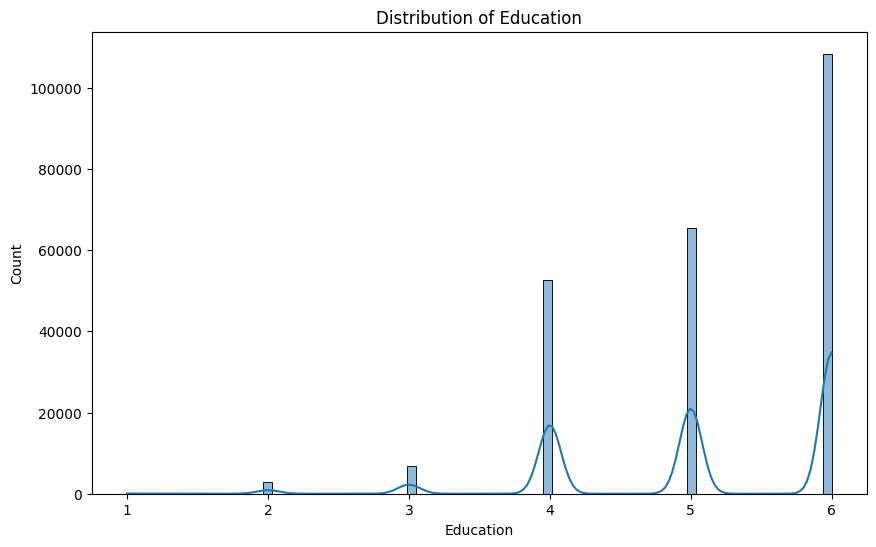

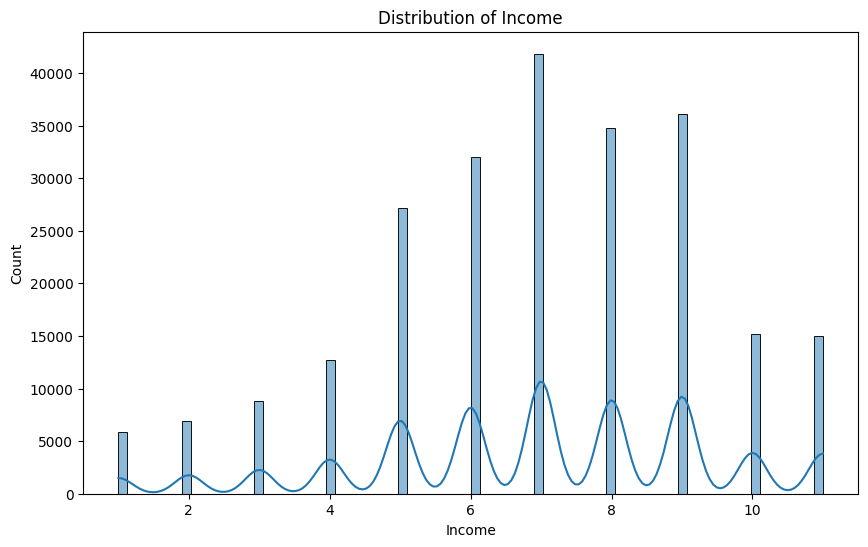

In [ ]:
# Step 2: Plot a detailed respective graph for each column
for column in data.columns:
    plt.figure(figsize=(10, 6))
    if data[column].dtype == 'object':
        sns.countplot(x=column, data=data)
    else:
        sns.histplot(data[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

In [ ]:
# Step 3: Analyse the data properly and train the most suitable machine learning model
# Identify features and target
X = data.drop('Fruits', axis=1)  # replace 'Outcome' with your target column
y = data['Fruits']  # replace 'Outcome' with your target column

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify numerical and categorical columns
num_features = X.select_dtypes(include=[np.number]).columns.tolist()
cat_features = X.select_dtypes(exclude=[np.number]).columns.tolist()

# Preprocessing for numerical data
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Preprocessing for categorical data
cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_features),
    ('cat', cat_pipeline, cat_features)
])

# Create a complete pipeline with the model
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Train the model
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Diabetes_012', 'HighBP',
                                                   'HighChol', 'CholCheck',
                                                   'BMI', 'Smoker', 'Stroke',
                                                   'HeartDiseaseorAttack',
                                                   'PhysActivity', 'Veggies',
                                                   'HvyAlcoholConsump',
                                                   'AnyHealthcare',
                                                   'NoDocbcCost', 'GenHlth',
                                                   'MentHlth', 'PhysHlth',
                                                   'DiffWalk', 'Sex', 'Age',
                                                   'Education', 'Income']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [ ]:
# Step 4: Test the trained model
y_pred = pipeline.predict(X_test)
y_pred
#X_pred = pipeline.predict(y_test)
#X_pred

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
# Step 5: Evaluate the model and tune the model to maximize the accuracy
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters and estimator
print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

# Evaluate the tuned model
y_pred_tuned = best_model.predict(X_test)
print("Tuned Model Classification Report:")
print(classification_report(y_test, y_pred_tuned))
print("Tuned Model Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_tuned))
print("Tuned Model Accuracy Score:", accuracy_score(y_test, y_pred_tuned))

Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.37      0.43     17974
           1       0.67      0.79      0.73     29302

    accuracy                           0.63     47276
   macro avg       0.60      0.58      0.58     47276
weighted avg       0.62      0.63      0.62     47276

Confusion Matrix:
[[ 6629 11345]
 [ 6045 23257]]
Accuracy Score: 0.632160081225146


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best Parameters: {'classifier__max_depth': 10, 'classifier__min_samples_split': 10, 'classifier__n_estimators': 100}
Tuned Model Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.28      0.38     17974
           1       0.67      0.90      0.77     29302

    accuracy                           0.66     47276
   macro avg       0.64      0.59      0.58     47276
weighted avg       0.65      0.66      0.62     47276

Tuned Model Confusion Matrix:
[[ 5002 12972]
 [ 3060 26242]]
Tuned Model Accuracy Score: 0.6608850156527625
